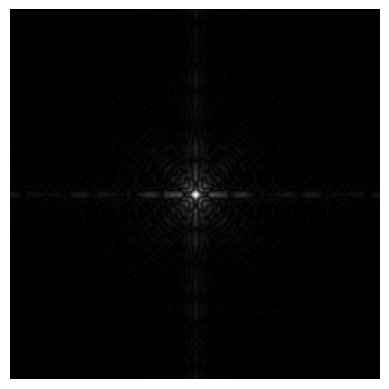

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('fourierspectrum.pgm')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Power Law Transformation

In [89]:
def power_law_transformation (c, y, img):
  img_shape = img.shape
  length = img_shape[0]
  height = img_shape[1]

  # create new img to return
  new_img = np.zeros((length, height))

  # loop through every pixel 
  for row in range (length):
    for col in range(height):
      new_img[row][col] = c * (img[row][col] ** y)

  # Normalize the image to [0, 255] range and cast to uint8
  new_img = np.clip(new_img, 0, 255)
  
  return new_img.astype(np.uint8)


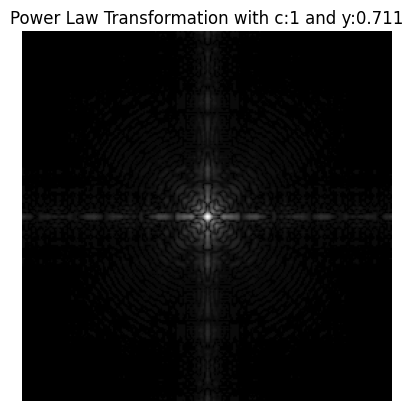

In [90]:
c = 1
y = 0.711

new_img = power_law_transformation(c, y, img)

plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.title(f'Power Law Transformation with c:{c} and y:{y}')
plt.show()

## Log Transformation

In [68]:
def log_transformation(c, img):
  img_shape = img.shape
  length = img_shape[0]
  height = img_shape[1]

  # create new img to return
  new_img = np.zeros((length, height))
  
  # loop through every pixel 
  for row in range (length):
    for col in range(height):
      new_img[row][col] = c * (np.log(1 + img[row][col]))

  # Normalize the image to [0, 255] range and cast to uint8
  new_img = np.clip(new_img, 0, 255)

  return new_img.astype(np.uint8)

  

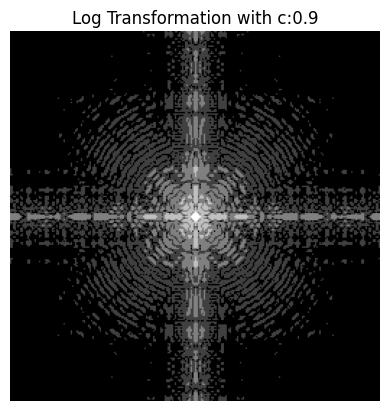

In [87]:
c = 0.9

new_img = log_transformation(c, img)

plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.title(f'Log Transformation with c:{c}')
plt.show()

# Histogram Equilization

In [134]:
# create a normalized histogram 
def normalized_hist(img):
  # ensure that all images are unint8 values
  img = np.uint8(img)

  m, n = img.shape
  hist = np.zeros(256)

  # loop through every pixel and count how many pixel intensities exist
  for row in range(m):
    for col in range(n):
      hist[img[row,col]] += 1

  return np.array(hist/(m*n))


def hist_equalization(img):
  hist = normalized_hist(img)
  cdf = np.cumsum(hist)
  transfer_img = np.uint8(255 * cdf)

  m,n  = img.shape

  new_img = np.zeros((m,n))

  for row in range(m):
    for col in range(n):
      new_img[row,col] = transfer_img[img[row,col]]
  
  return new_img





## Initial Image

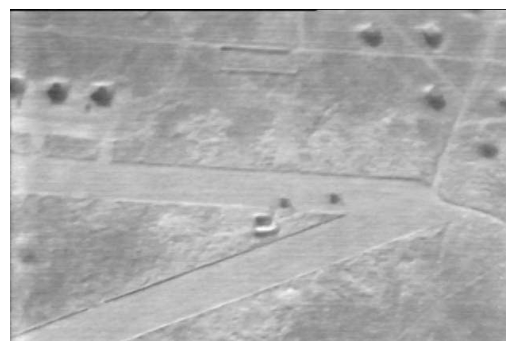

In [143]:
img = mpimg.imread('banker.jpeg')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

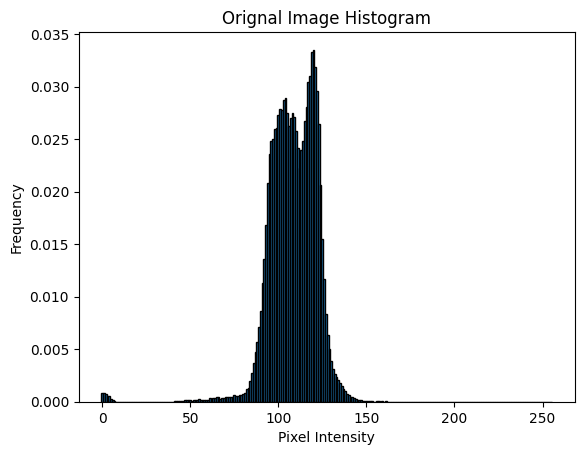

In [141]:
hist = normalized_hist(img)

plt.bar(range(256), hist, width=1.0, edgecolor='black')
plt.title('Orignal Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

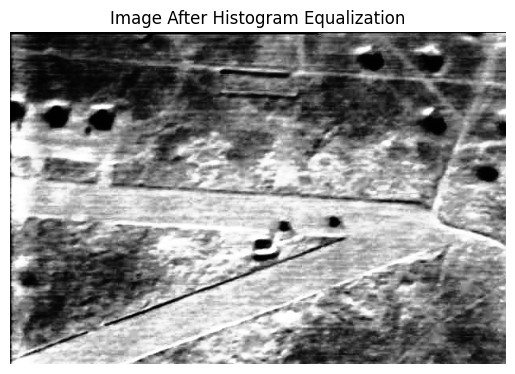

In [137]:
hist_equalization_img = hist_equalization(img)
plt.imshow(hist_equalization_img, cmap='gray')
plt.axis('off')
plt.title('Image After Histogram Equalization')
plt.show()


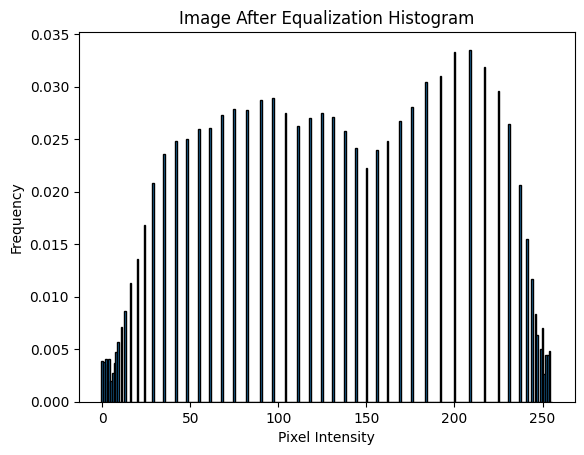

In [144]:
hist = normalized_hist(hist_equalization_img)

plt.bar(range(256), hist, width=1.0, edgecolor='black')
plt.title('Image After Equalization Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()